# Import packages I need and data

In [1]:
## import all the packages you need 
import psycopg2
import numpy as np
import pandas as pd
from getpass import getpass
from sqlalchemy import create_engine
import seaborn as sns
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Enter database connection parameters
# Could also store and read these as environment variables,
# but best practice is to never include credentials directly
# in version control
hostname = "spinup-db001ec7.cluster-c9ukc6s0rmbg.us-east-1.rds.amazonaws.com"
username = "introml568"
password = "***********************"
database_name = "urineculture"

In [3]:
# Connect using SQL Alchemy to support pandas mapping
alchemy_engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{hostname}/{database_name}",  pool_recycle=3600)
db_connection = alchemy_engine.connect();

In [4]:
# Read in SQL tables through Pandas: results
results = pd.read_sql("select * from results", db_connection);

In [5]:
results.head(10)

,id,patid,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,...,skin_preps,smoking_deterrents,thyroid_preps,unclassified_drug_products,vitamins,dispo,UTI_diag,split,abxUTI,alt_diag
0,1,1,1,few,negative,negative,clear,yellow,small,negative,...,0,0,0,0,0,Admit,1,training,1,0
1,2,1,0,many,negative,small,clear,yellow,None,negative,...,0,0,0,0,1,Admit,1,training,1,0
2,3,2,1,few,negative,negative,clear,yellow,small,negative,...,0,0,1,1,0,Discharge,0,training,0,0
3,4,3,1,many,negative,negative,not_clear,yellow,None,negative,...,0,0,0,0,1,Admit,1,training,1,0
4,5,4,0,moderate,small,negative,clear,orange,None,negative,...,0,0,0,0,0,AMA,0,training,0,0
5,6,4,1,few,small,large,not_clear,yellow,large,negative,...,0,0,0,0,0,Discharge,0,training,0,0
6,7,5,1,few,negative,moderate,not_clear,yellow,small,negative,...,0,0,0,0,0,Discharge,1,training,1,0
7,8,6,1,few,negative,small,clear,yellow,None,negative,...,0,0,0,0,0,Admit,0,training,0,0
8,9,7,1,few,negative,moderate,clear,yellow,small,negative,...,0,0,0,0,1,Admit,1,training,1,0
9,10,8,1,few,negative,large,not_clear,yellow,None,small,...,0,0,0,0,0,Admit,1,training,1,0


In [6]:
# drop useless columns: UCX_abnormal, split, abx_UTI, alt_diag
drop_columns = ['UCX_abnormal','split','abxUTI','alt_diag']
results = results.drop(drop_columns, axis=1)

In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80387 entries, 0 to 80386
Columns: 216 entries, id to UTI_diag
dtypes: float64(89), int64(91), object(36)
memory usage: 132.5+ MB


In [8]:
results.describe()

,id,patid,ua_ph,ua_spec_grav,CVA_tenderness,abd_tenderness,abd_soft,abd_distended,abd_gaurding,abd_mass,...,muscle_relaxants,pre_natal_vitamins,psychotherapeutic_drugs,sedative_hypnotics,skin_preps,smoking_deterrents,thyroid_preps,unclassified_drug_products,vitamins,UTI_diag
count,80387.000000,80387.000000,80260.000000,80387.000000,14624.000000,68135.000000,70622.0,47265.000000,41342.000000,16092.000000,...,80387.000000,80387.000000,80387.000000,80387.000000,80387.000000,80387.000000,80387.000000,80387.000000,80387.000000,80387.000000
mean,40194.000000,27160.079602,6.312428,1.019084,0.242273,0.456461,1.0,0.086999,0.087877,0.020569,...,0.073980,0.048441,0.374053,0.069165,0.111498,0.017913,0.122669,0.195467,0.321333,0.213542
std,23205.872382,16045.123111,0.670796,0.018803,0.428473,0.498104,0.0,0.281836,0.283119,0.141941,...,0.261739,0.214697,0.483880,0.253737,0.314750,0.132637,0.328059,0.396562,0.466991,0.409810
min,1.000000,1.000000,5.000000,0.018000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20097.500000,13267.500000,6.000000,1.013000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40194.000000,26693.000000,6.000000,1.018000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60290.500000,40826.500000,6.500000,1.025000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80387.000000,55365.000000,9.000000,5.500000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
results.shape

(80387, 216)

Perfrom EDA for continuous and catgorical features

In [10]:
numeric_features = results.select_dtypes(include=[np.number])
numeric_features.columns

Index(['id', 'patid', 'ua_ph', 'ua_spec_grav', 'CVA_tenderness',
       'abd_tenderness', 'abd_soft', 'abd_distended', 'abd_gaurding',
       'abd_mass',
       ...
       'muscle_relaxants', 'pre_natal_vitamins', 'psychotherapeutic_drugs',
       'sedative_hypnotics', 'skin_preps', 'smoking_deterrents',
       'thyroid_preps', 'unclassified_drug_products', 'vitamins', 'UTI_diag'],
      dtype='object', length=180)

In [11]:
categorical_features = results.select_dtypes(include=[np.object])
categorical_features.columns

Index(['ua_bacteria', 'ua_bili', 'ua_blood', 'ua_clarity', 'ua_color',
       'ua_epi', 'ua_glucose', 'ua_ketones', 'ua_leuk', 'ua_nitrite',
       'ua_protein', 'ua_rbc', 'ua_urobili', 'ua_wbc', 'polyuria',
       'chief_complaint', 'gender', 'race', 'ethnicity', 'lang',
       'maritalStatus', 'employStatus', 'insurance_status', 'disposition',
       'arrival', 'O2_Dependency_First', 'O2_Dependency_Last',
       'Absolute_Lymphocyte_Count', 'Basophils', 'Eosinophils', 'Lymphocytes',
       'Monocytes', 'Neutrophils',
       'Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__',
       'Screening_and_history_of_mental_health_and_substance_abuse_code',
       'dispo'],
      dtype='object')

In [12]:
correlation = numeric_features.corr()
print(correlation['UTI_diag'].sort_values(ascending = False),'\n')

UTI_diag                 1.000000
abx                      0.452602
dysuria                  0.246609
hematuria                0.139427
psychiatric_confusion    0.091511
                           ...   
id                      -0.132653
abd_soft                      NaN
gen_neg                       NaN
alert                         NaN
oriented                      NaN
Name: UTI_diag, Length: 180, dtype: float64 



In [19]:
total = results.isnull().sum().sort_values(ascending=False)
percent = (results.isnull().sum()/results.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
Screening_and_history_of_mental_health_and_substance_abuse_code,80387,1.000000
Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__,80387,1.000000
polyuria,74999,0.932974
dec_urine_vol,73490,0.914203
pelvic_pain,73002,0.908132
gen_neg,72143,0.897446
abd_rigidity,71971,0.895306
ams,71525,0.889758
O2_Amount_Last,70924,0.882282


As we totally have 80387 raws, I will take out the columns which have more than 10% missing values.

In [20]:
missing_data[missing_data['% of Total Observations'] <= 0.1]

,Total Missing Count,% of Total Observations
Feature,,
ua_urobili,4255,0.052931
O2_Dependency_First,1651,0.020538
O2_Dependency_Last,1651,0.020538
Temp_Last,1327,0.016508
Temp_Max,1327,0.016508
...,...,...
Non_Hodgkins_lymphoma,0,0.000000
Nephritis__nephrosis__renal_sclerosis,0,0.000000
Menstrual_disorders,0,0.000000


In [21]:
# retain the columns which have less than 10% missing values
retain_column = missing_data[missing_data['% of Total Observations'] <= 0.1].index.tolist()
results = results[retain_column]

In [22]:
# take out the raws with missing value
results = results.dropna(axis=0)

In [23]:
results

,ua_urobili,O2_Dependency_First,O2_Dependency_Last,Temp_Last,Temp_Max,Temp_Min,Temp_Mean,Temp_First,arrival,race,...,Pancreatic_disorders__not_diabetes_,Other_non_epithelial_cancer_of_skin,Other_male_genital_disorders,Other_female_genital_disorders,Other_and_ill_defined_heart_disease,Non_Hodgkins_lymphoma,Nephritis__nephrosis__renal_sclerosis,Menstrual_disorders,Maintenance_chemotherapy__radiotherapy,UTI_diag
0,negative,ROOM,ROOM,5.0,5.0,5.0,5.0,5.0,Car,Other,...,0,0,0,0,0,0,0,0,0,1
1,negative,ROOM,ROOM,2.0,2.0,2.0,2.0,2.0,EMS,White or Caucasian,...,0,0,0,0,0,0,0,0,0,1
2,negative,ROOM,ROOM,4.0,4.0,4.0,4.0,4.0,Car,White or Caucasian,...,0,0,0,0,0,0,0,0,0,0
3,negative,ROOM,ROOM,2.0,2.0,2.0,2.0,2.0,Car,White or Caucasian,...,0,0,0,0,0,0,0,0,0,1
4,negative,ROOM,ROOM,4.0,4.0,4.0,4.0,4.0,Car,Black or African American,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80382,negative,ROOM,ROOM,1.0,1.0,1.0,1.0,1.0,Car,Other,...,0,0,0,0,0,0,0,0,0,0
80383,negative,ROOM,ROOM,1.0,1.0,1.0,1.0,1.0,Car,Other,...,0,0,0,0,0,0,0,0,0,1
80384,negative,ROOM,ROOM,4.0,4.0,4.0,4.0,4.0,Car,Hispanic/Latino,...,0,0,0,0,0,0,0,0,0,0
80385,negative,ROOM,ROOM,5.0,5.0,5.0,5.0,5.0,Car,White or Caucasian,...,0,0,0,0,0,0,0,0,0,0


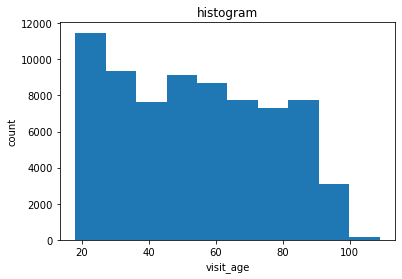

In [26]:
# histograms for patient age at visit
plt.hist(results.age)
plt.title("histogram")
plt.xlabel("visit_age")
plt.ylabel("count")
plt.show()

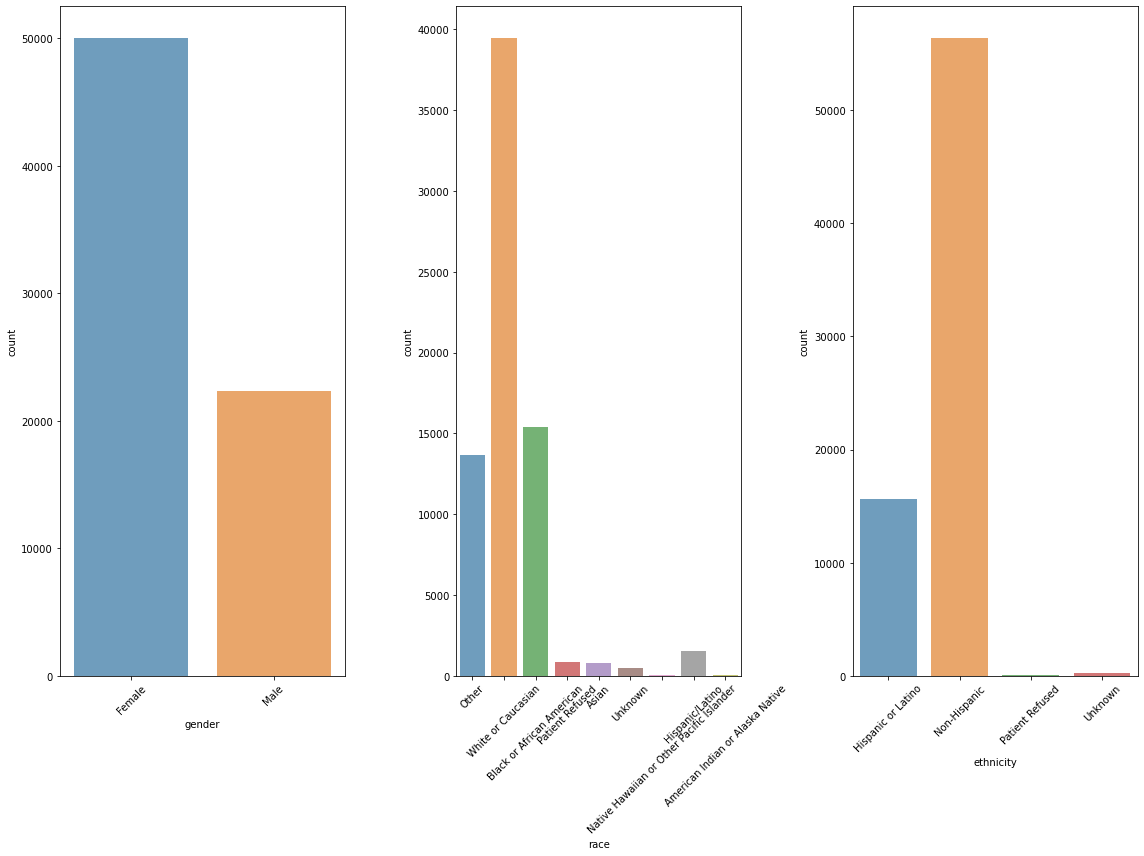

In [31]:
# bar chart for'gender', 'race', 'ethnicity'
# select catgorical columns of interest
cat_col = ['gender', 'race', 'ethnicity']
df_cat = results[cat_col]

# create figures and plots
fig, axes = plt.subplots(1, 3, figsize=(16, 12))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

Transform the continuous variables into dummy variables

In [32]:
results = pd.get_dummies(results)

In [33]:
results

,Temp_Last,Temp_Max,Temp_Min,Temp_Mean,Temp_First,O2_Sat_Max,O2_Sat_Mean,O2_Sat_Min,O2_Sat_Last,O2_Sat_First,...,ua_glucose_moderate,ua_glucose_negative,ua_glucose_other,ua_glucose_small,ua_color_amber,ua_color_colorless,ua_color_orange,ua_color_other,ua_color_red,ua_color_yellow
0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,...,0,1,0,0,0,0,0,0,0,1
1,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,1
3,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80382,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,0,1,0,0,0,0,0,0,0,1
80383,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,...,0,1,0,0,0,0,0,0,0,1
80384,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0,1,0,0,0,0,0,0,0,1
80385,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,1


Feature Engineering

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [40]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0,1,0.05)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [41]:
X = results.drop('UTI_diag',axis=1)
y = results.UTI_diag
search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................model__alpha=0.0;, score=-0.172 total time=  15.2s
[CV 2/5] END .................model__alpha=0.0;, score=-0.104 total time=  15.3s
[CV 3/5] END .................model__alpha=0.0;, score=-0.098 total time=  15.2s
[CV 4/5] END .................model__alpha=0.0;, score=-0.099 total time=  15.1s
[CV 5/5] END .................model__alpha=0.0;, score=-0.124 total time=  15.0s
[CV 1/5] END ................model__alpha=0.05;, score=-0.198 total time=   2.5s
[CV 2/5] END ................model__alpha=0.05;, score=-0.114 total time=   2.0s
[CV 3/5] END ................model__alpha=0.05;, score=-0.114 total time=   3.4s
[CV 4/5] END ................model__alpha=0.05;, score=-0.112 total time=   2.3s
[CV 5/5] END ................model__alpha=0.05;, score=-0.123 total time=   2.3s
[CV 1/5] END .................model__alpha=0.1;, score=-0.219 total time=   0.8s
[CV 2/5] END .................model__alpha=0.1;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error', verbose=3)

In [37]:
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_

In [38]:
search.best_params_

{'model__alpha': 0.01}

The features that survived the Lasso regression are:

In [39]:
features = X.columns
importance = np.abs(coefficients)
np.array(features)[importance > 0]

array(['antibiotics', 'antiinfectives_miscellaneous', 'antiarthritics',
       'id',
       'Delirium__dementia__and_amnestic_and_other_cognitive_disorders',
       'abx', 'age', 'employStatus_Retired',
       'chief_complaint_ALTERED MENTAL STATUS', 'chief_complaint_DYSURIA',
       'chief_complaint_FEMALE GU PROBLEM', 'chief_complaint_FEVER',
       'chief_complaint_FEVER-9 WEEKS TO 74 YEARS',
       'chief_complaint_URINARY TRACT INFECTION', 'maritalStatus_Widowed',
       'disposition_Discharge', 'dispo_Discharge', 'ua_blood_negative',
       'ua_protein_moderate', 'ua_leuk_large', 'ua_leuk_moderate',
       'ua_leuk_negative', 'ua_nitrite_negative', 'ua_nitrite_positive',
       'ua_color_amber', 'ua_color_yellow'], dtype=object)

In [45]:
# retain the important features 
retain_feature = np.array(features)[importance > 0]
X = X[retain_feature]

Separate data into training, validation, and testing data frameworks for model 
evaluation

In [49]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=13)

In [50]:
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=13)

In [51]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(57891, 26)
(57891,)
(7236, 26)
(7236,)
(7237, 26)
(7237,)


(None, None)

Use three model types for evaluation: (logistic regression, random forest, and xgboost)

Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
predictions_logistic_regression = model.predict(X_valid)

from sklearn.metrics import accuracy_score
accuracy_logistic_regression = accuracy_score(y_valid,predictions_logistic_regression)
print("Accuracy: %.2f%%" % (accuracy_logistic_regression * 100.0))

Accuracy: 80.78%


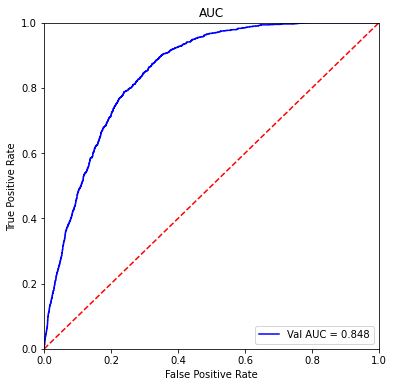

In [57]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
pred = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('AUC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

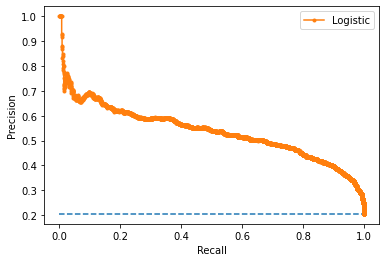

In [68]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

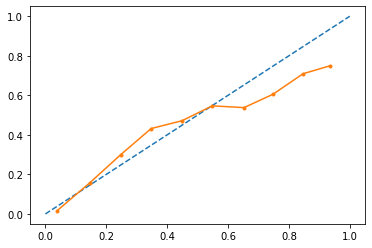

In [71]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
# fit a model
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
predictions_random_forest = rf.predict(X_valid)

from sklearn.metrics import accuracy_score
accuracy_random_forest = accuracy_score(y_valid,predictions_random_forest)
print("Accuracy: %.2f%%" % (accuracy_random_forest * 100.0))

Accuracy: 87.47%


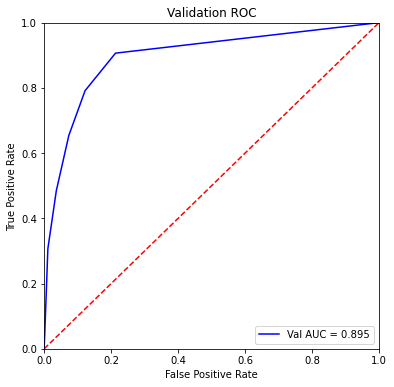

In [52]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
pred = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('AUC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

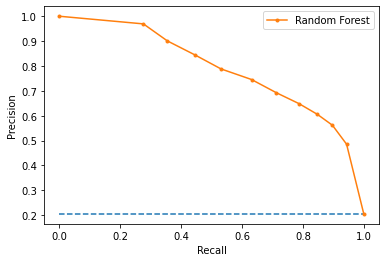

In [92]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
rf_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

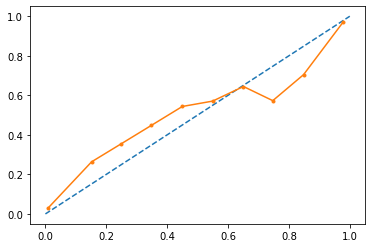

In [83]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
# fit a model
calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

Xgboost

In [86]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_valid)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.76%


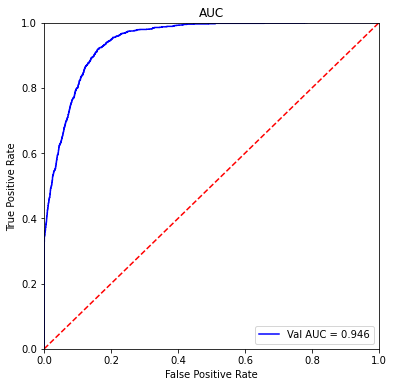

In [87]:
pred = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('AUC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

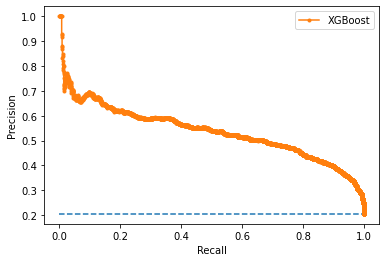

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
xb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xb_probs = xb_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
xb_precision, xb_recall, _ = precision_recall_curve(y_test, xb_probs)
xb_f1, xb_auc = f1_score(y_test, yhat), auc(rf_recall, xb_precision)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--')
pyplot.plot(rf_recall, rf_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

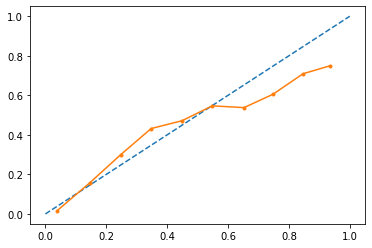

In [96]:
# fit a model
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()